In [1]:
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import time
import matplotlib.pyplot as plt
import json

In [2]:
cleaned_data = pd.read_csv('../data/processed_movies_1.csv')
cleaned_data = cleaned_data.drop(columns=['Unnamed: 0'])

In [3]:
cleaned_data.head()

,genre_ids,id,overview,popularity,release_date,title,vote_average,vote_count,budget,imdb_id,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
0,"[878, 28, 12]",912649,Eddie and Venom are on the run. Hunted by both...,3197.278,2024-10-22,Venom: The Last Dance,6.500,759,120000000,tt16366836,...,False,False,False,False,False,True,False,False,False,False
1,"[27, 53, 9648]",1034541,Five years after surviving Art the Clown's Hal...,2204.248,2024-10-09,Terrifier 3,6.925,1012,2000000,tt27911000,...,False,True,False,True,False,False,False,True,False,False
2,"[16, 878, 10751]",1184918,"After a shipwreck, an intelligent robot called...",1868.856,2024-09-12,The Wild Robot,8.500,2899,78000000,tt29623480,...,False,False,False,False,False,True,False,False,False,False
3,"[28, 12, 18]",558449,Years after witnessing the death of the revere...,1978.412,2024-11-13,Gladiator II,6.800,400,310000000,tt9218128,...,False,False,False,False,False,False,False,False,False,False
4,"[28, 35, 878]",533535,A listless Wade Wilson toils away in civilian ...,1490.952,2024-07-24,Deadpool & Wolverine,7.700,5465,200000000,tt6263850,...,False,False,False,False,False,True,False,False,False,False


In [4]:
cleaned_data.shape, cleaned_data.dtypes

((2002, 45),
 genre_ids                                 object
 id                                         int64
 overview                                  object
 popularity                               float64
 release_date                              object
 title                                     object
 vote_average                             float64
 vote_count                                 int64
 budget                                     int64
 imdb_id                                   object
 production_companies                      object
 production_countries                      object
 runtime                                    int64
 tagline                                   object
 spoken_languages                          object
 domestic_opening                         float64
 domestic_gross                           float64
 asia_pacific_opening                     float64
 asia_pacific_gross                       float64
 europe_middle_east_and_africa_openin

In [5]:
numerical_data = cleaned_data.select_dtypes(include=[np.number])
numerical_data.head()

,id,popularity,vote_average,vote_count,budget,runtime,domestic_opening,domestic_gross,asia_pacific_opening,asia_pacific_gross,europe_middle_east_and_africa_opening,europe_middle_east_and_africa_gross,latin_america_opening,latin_america_gross,domestic,international,worldwide
0,912649,3197.278,6.500,759,120000000,109,51012404.0,128094490.0,12669884.0,37742128.0,27725511.0,66814517.0,8394231.0,20365630.0,128094490.0,308500000.0,4.365945e+08
1,1034541,2204.248,6.925,1012,2000000,125,18928113.0,53981071.0,1201876.0,4909632.0,10667946.0,22930009.0,1784896.0,3556242.0,53981071.0,31395883.0,8.537695e+07
2,1184918,1868.856,8.500,2899,78000000,102,35790150.0,137913995.0,4513231.0,26267130.0,16983417.0,83132264.0,7359239.0,42402473.0,137913995.0,171143000.0,3.090570e+08
3,558449,1978.412,6.800,400,310000000,148,NaN,NaN,9200000.0,9200000.0,49245191.0,49356871.0,8344008.0,8405072.0,0.0,87000000.0,8.700000e+07
4,533535,1490.952,7.700,5465,200000000,128,211435291.0,636745858.0,54693311.0,154480407.0,76771204.0,307847954.0,41460895.0,107787788.0,636745858.0,701154969.0,1.337901e+09


In [6]:
numerical_data.describe()

,id,popularity,vote_average,vote_count,budget,runtime,domestic_opening,domestic_gross,asia_pacific_opening,asia_pacific_gross,europe_middle_east_and_africa_opening,europe_middle_east_and_africa_gross,latin_america_opening,latin_america_gross,domestic,international,worldwide
count,2.002000e+03,2002.000000,2002.000000,2002.000000,2.002000e+03,2002.000000,1.549000e+03,1.549000e+03,1.571000e+03,1.571000e+03,1.630000e+03,1.630000e+03,1.234000e+03,1.234000e+03,2.002000e+03,2.002000e+03,2.002000e+03
mean,4.150167e+05,69.586541,6.619838,2826.715285,4.254863e+07,108.855644,1.928508e+07,6.475988e+07,6.385599e+06,2.377129e+07,8.676906e+06,3.568145e+07,3.485657e+06,1.395196e+07,5.010523e+07,7.276452e+07,1.229328e+08
std,4.112744e+05,143.036182,0.839639,3270.556427,5.694636e+07,20.621252,2.504412e+07,7.885152e+07,1.133660e+07,4.191161e+07,1.426460e+07,5.720974e+07,6.489765e+06,2.293098e+07,7.446293e+07,1.287888e+08,1.958085e+08
min,1.400000e+01,15.491000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,7.430000e+02,0.000000e+00,2.500000e+01,0.000000e+00,1.930000e+02,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,1.930000e+02
25%,1.371675e+04,30.177750,6.144000,361.750000,0.000000e+00,95.000000,2.493020e+06,1.213856e+07,2.188770e+05,1.046321e+06,3.406702e+05,1.363684e+06,1.404988e+05,1.513867e+06,4.459475e+04,1.124684e+06,5.384521e+06
50%,2.996105e+05,41.049500,6.667500,1762.000000,2.000000e+07,106.000000,1.269142e+07,4.427735e+07,2.052801e+06,8.879125e+06,3.399630e+06,1.463141e+07,1.104038e+06,5.920086e+06,2.501064e+07,2.319798e+07,4.981575e+07
75%,7.854275e+05,62.952750,7.187500,4061.250000,6.000000e+07,119.000000,2.553482e+07,8.976096e+07,7.536020e+06,2.885155e+07,1.133499e+07,4.685712e+07,4.022151e+06,1.633926e+07,7.059916e+07,9.014294e+07,1.648655e+08
max,1.320637e+06,3197.278000,10.000000,25585.000000,4.600000e+08,209.000000,3.571150e+08,8.583730e+08,1.623613e+08,5.378764e+08,2.003668e+08,7.518936e+08,8.020204e+07,2.728488e+08,8.583730e+08,1.941066e+09,2.799439e+09


<Axes: >

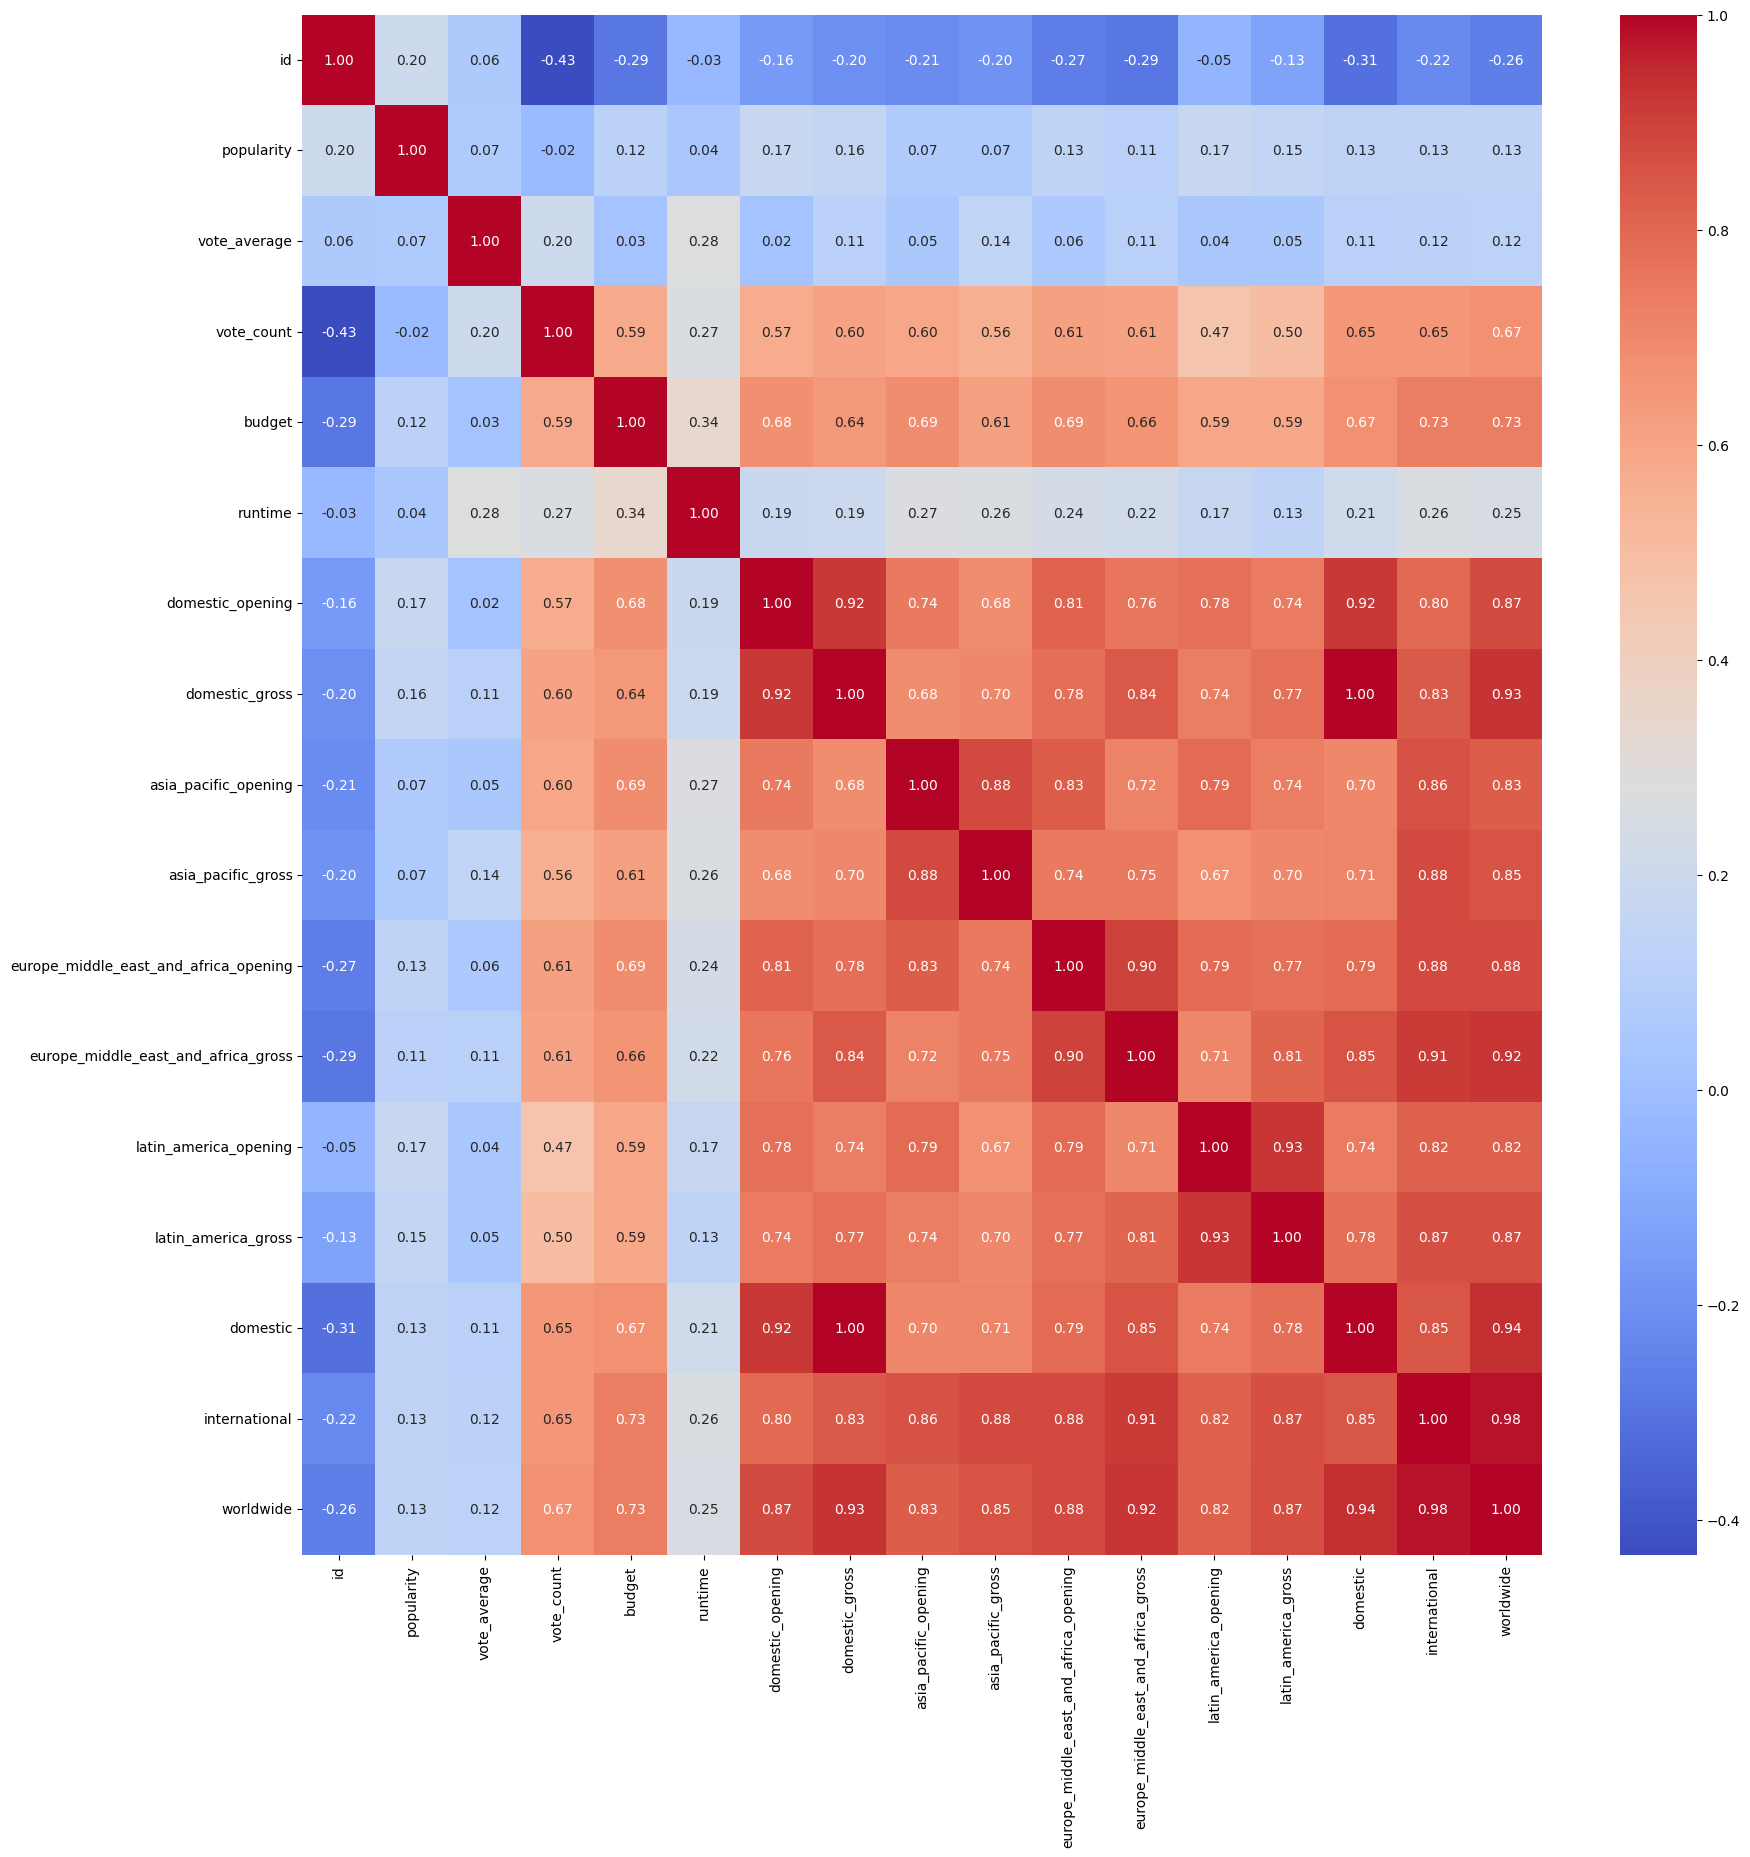

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

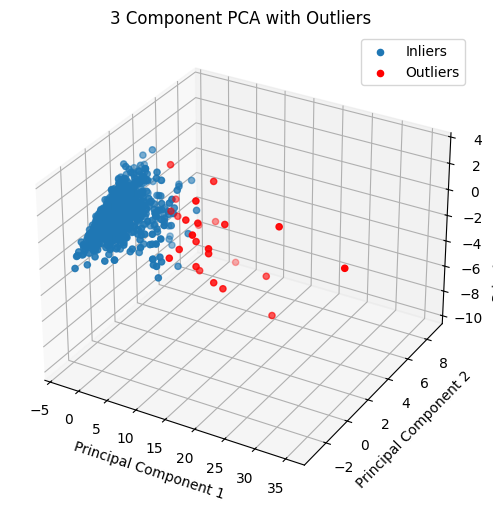

,id,popularity,vote_average,vote_count,budget,runtime,domestic_opening,domestic_gross,asia_pacific_opening,asia_pacific_gross,europe_middle_east_and_africa_opening,europe_middle_east_and_africa_gross,latin_america_opening,latin_america_gross,domestic,international,worldwide
0,912649,3197.278,6.500,759,120000000,109,51012404.0,128094490.0,12669884.0,37742128.0,27725511.0,66814517.0,8394231.0,20365630.0,128094490.0,3.085000e+08,4.365945e+08
1,1034541,2204.248,6.925,1012,2000000,125,18928113.0,53981071.0,1201876.0,4909632.0,10667946.0,22930009.0,1784896.0,3556242.0,53981071.0,3.139588e+07,8.537695e+07
2,1184918,1868.856,8.500,2899,78000000,102,35790150.0,137913995.0,4513231.0,26267130.0,16983417.0,83132264.0,7359239.0,42402473.0,137913995.0,1.711430e+08,3.090570e+08
3,533535,1490.952,7.700,5465,200000000,128,211435291.0,636745858.0,54693311.0,154480407.0,76771204.0,307847954.0,41460895.0,107787788.0,636745858.0,7.011550e+08,1.337901e+09
4,933260,1356.547,7.273,2048,17500000,141,3205212.0,16235191.0,871771.0,7929030.0,4017172.0,16234963.0,682249.0,9560703.0,16235191.0,3.522818e+07,5.146337e+07
5,698687,1200.390,8.100,718,75000000,104,24613970.0,59042233.0,2203752.0,20405749.0,5172121.0,17618173.0,1429289.0,7615221.0,59042233.0,6.983393e+07,1.288762e+08
7,945961,1011.771,7.254,2319,80000000,119,42003361.0,105313091.0,13199610.0,43957169.0,19094096.0,67567648.0,4828555.0,14346405.0,105313091.0,2.455479e+08,3.508610e+08
8,519182,875.791,7.100,2173,100000000,94,75009210.0,361004205.0,14989191.0,107254900.0,43613664.0,312841800.0,17513054.0,127264599.0,361004205.0,6.072365e+08,9.682407e+08
9,1022789,731.716,7.589,4756,200000000,97,154201673.0,652980194.0,40492372.0,208691488.0,69418701.0,438401346.0,69035039.0,272848765.0,652980194.0,1.045238e+09,1.698218e+09
46,502356,186.312,7.600,9128,100000000,93,146361865.0,574934330.0,36885069.0,196251455.0,76012406.0,363161717.0,49271781.0,203271641.0,574934330.0,7.876327e+08,1.362567e+09


In [11]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Drop NA
numerical_data1 = numerical_data.dropna(axis=0, how='any')
numerical_data_normalized = (numerical_data1 - numerical_data1.mean()) / numerical_data1.std()

# Fit PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(numerical_data_normalized)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Detect outliers using Z-score
z_scores = np.abs(stats.zscore(principal_df))
outliers = (z_scores > 3).any(axis=1)

# Reset index of the original DataFrame
numerical_data1_reset = numerical_data1.reset_index(drop=True)

# Create a DataFrame containing only the outliers
outliers_df = principal_df[outliers]

# Get the original data for the outliers
original_outliers_df = numerical_data1_reset[outliers]

# Plot the first three principal components with outliers highlighted
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_df.loc[~outliers, 'PC1'], principal_df.loc[~outliers, 'PC2'], principal_df.loc[~outliers, 'PC3'], label='Inliers')
ax.scatter(principal_df.loc[outliers, 'PC1'], principal_df.loc[outliers, 'PC2'], principal_df.loc[outliers, 'PC3'], color='r', label='Outliers')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3 Component PCA with Outliers')
ax.legend()
plt.show()

# Display the original data for the outliers
original_outliers_df

In [9]:
cleaned_data.loc[cleaned_data['id'].isin(original_outliers_df['id'])].select_dtypes(exclude=[np.bool_])

,genre_ids,id,overview,popularity,release_date,title,vote_average,vote_count,budget,imdb_id,...,domestic_gross,asia_pacific_opening,asia_pacific_gross,europe_middle_east_and_africa_opening,europe_middle_east_and_africa_gross,latin_america_opening,latin_america_gross,domestic,international,worldwide
0,"[878, 28, 12]",912649,Eddie and Venom are on the run. Hunted by both...,3197.278,2024-10-22,Venom: The Last Dance,6.500,759,120000000,tt16366836,...,128094490.0,12669884.0,37742128.0,27725511.0,66814517.0,8394231.0,20365630.0,128094490.0,308500000.0,4.365945e+08
1,"[27, 53, 9648]",1034541,Five years after surviving Art the Clown's Hal...,2204.248,2024-10-09,Terrifier 3,6.925,1012,2000000,tt27911000,...,53981071.0,1201876.0,4909632.0,10667946.0,22930009.0,1784896.0,3556242.0,53981071.0,31395883.0,8.537695e+07
2,"[16, 878, 10751]",1184918,"After a shipwreck, an intelligent robot called...",1868.856,2024-09-12,The Wild Robot,8.500,2899,78000000,tt29623480,...,137913995.0,4513231.0,26267130.0,16983417.0,83132264.0,7359239.0,42402473.0,137913995.0,171143000.0,3.090570e+08
4,"[28, 35, 878]",533535,A listless Wade Wilson toils away in civilian ...,1490.952,2024-07-24,Deadpool & Wolverine,7.700,5465,200000000,tt6263850,...,636745858.0,54693311.0,154480407.0,76771204.0,307847954.0,41460895.0,107787788.0,636745858.0,701154969.0,1.337901e+09
5,"[18, 27, 878]",933260,A fading celebrity decides to use a black mark...,1356.547,2024-09-07,The Substance,7.273,2048,17500000,tt17526714,...,16235191.0,871771.0,7929030.0,4017172.0,16234963.0,682249.0,9560703.0,16235191.0,35228181.0,5.146337e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,"[36, 18]",975056,Italian immigrant Francesca Cabrini arrives in...,31.871,2024-03-07,Cabrini,7.800,87,50000000,tt14351082,...,19512134.0,4425.0,273460.0,0.0,395056.0,0.0,280265.0,19512134.0,948781.0,2.046092e+07
1502,[18],1058694,"In a Mexican border town plagued by neglect, c...",28.927,2023-10-19,Radical,8.400,416,10000000,tt14570440,...,8702731.0,19847.0,211595.0,60854.0,553903.0,2482359.0,12360486.0,8702731.0,13125984.0,2.182872e+07
1527,"[12, 878, 28]",1858,Young teenager Sam Witwicky becomes involved i...,30.489,2007-06-27,Transformers,6.808,11202,150000000,tt0418279,...,319246193.0,41701696.0,157226316.0,45615657.0,141520549.0,10506334.0,42206217.0,319246193.0,390463587.0,7.097098e+08
1619,"[14, 12]",338952,Gellert Grindelwald has escaped imprisonment a...,29.336,2018-11-14,Fantastic Beasts: The Crimes of Grindelwald,6.900,10770,200000000,tt4123430,...,159555901.0,35728666.0,141211839.0,63728354.0,219068279.0,14211277.0,37543620.0,159555901.0,496200000.0,6.557559e+08


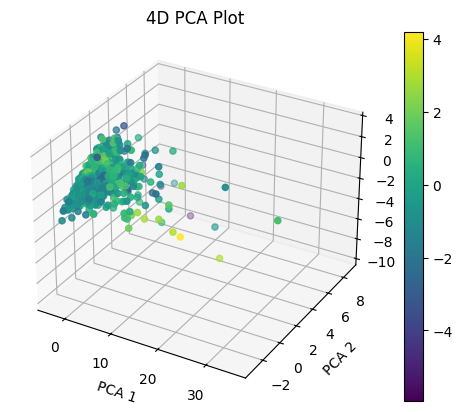

NameError: name 'pandas' is not defined

In [10]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Drop NA
numerical_data1 = numerical_data.dropna(axis=0, how='any')
numerical_data_normalized = (numerical_data1 - numerical_data1.mean()) / numerical_data1.std()

# Perform PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(numerical_data_normalized)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the 4th dimension as color
sc = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=pca_result[:, 3], cmap='viridis')

# Add color bar
plt.colorbar(sc)

# Labels
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.title('4D PCA Plot')

plt.show()


loadings = pandas.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

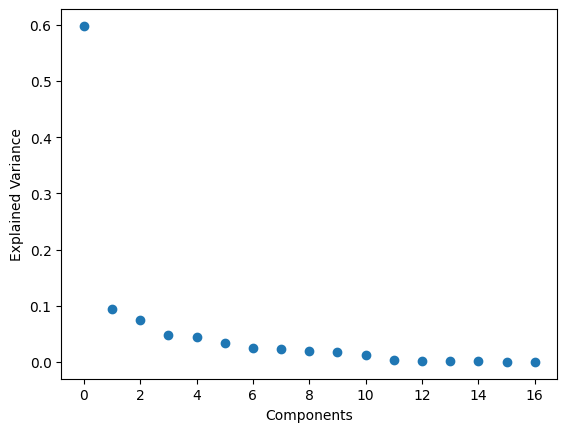

array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        4.00000000e+00, 5.00000000e+00, 6.00000000e+00, 7.00000000e+00,
        8.00000000e+00, 9.00000000e+00, 1.00000000e+01, 1.10000000e+01,
        1.20000000e+01, 1.30000000e+01, 1.40000000e+01, 1.50000000e+01,
        1.60000000e+01],
       [5.98280941e-01, 9.47932879e-02, 7.46781255e-02, 4.83383648e-02,
        4.41198595e-02, 3.35377870e-02, 2.41045560e-02, 2.26967275e-02,
        1.94546075e-02, 1.77676595e-02, 1.26430215e-02, 3.52408417e-03,
        2.43792617e-03, 2.25203947e-03, 1.37072126e-03, 2.86265887e-07,
        4.64277176e-09]])

In [ ]:
# Normalize the data
numerical_data1 = numerical_data.dropna(axis=0, how='any')

# You must normalize the data before applying the fit method
df_normalized=(numerical_data1 - numerical_data1.mean()) / numerical_data1.std()
pca = PCA(n_components=numerical_data1.shape[1])
pca.fit(df_normalized)

varience_ratio = pca.explained_variance_ratio_
varience_ratio = np.vstack((np.arange(varience_ratio.shape[0]), varience_ratio))
plt.scatter(varience_ratio[0], varience_ratio[1])
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()
varience_ratio